## **Neural Network classification with PyTorch**

#### **1. Make classification and get it ready**

In [153]:
import sklearn

In [154]:
from sklearn.datasets import make_circles

# Make 1000 samples 
n_samples = 1000

# Standard deviation of Gaussian noise
noise = 0.03

# Reproducibility 
RANDOM_SEED = 42

# Create circles 
X, y = make_circles(n_samples = n_samples,
                    noise = noise,
                    random_state=RANDOM_SEED)

##### Why use noise? (Note)

* To simulate **realistic** data.
* To test how well your model performs with **imperfect inputs**.
* To prevent **overfitting** in training (model memorizing perfect patterns).



In [155]:
len(X), len(y)

(1000, 1000)

In [156]:
print(f'First 5 samples of X: \n {X[:5]}')
print(f'First 5 samples of y: \n {y[:5]}')

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [157]:
# Make DataFrame of circle data
import pandas as pd 
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [158]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

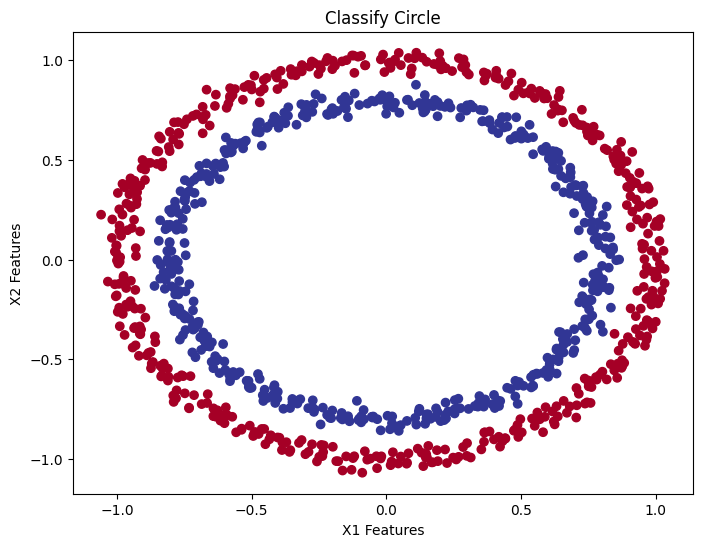

In [159]:
# Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c = y, # Must need to understand 
            cmap = 'RdYlBu') # Must need to understand
plt.xlabel('X1 Features')
plt.ylabel('X2 Features')
plt.title('Classify Circle')
plt.show()


##### **1.1 Check input features and output label shapes** 

In [160]:
X_sample = X[0]
y_sample = y[0]
print(f'Values for one sample of X: {X_sample}\n')
print(f'Values for one sample of y: {y_sample}\n')
print(f'Shapes for one sample of X: {X_sample.shape}\n')
print(f'Dimension for one sample of X: {X_sample.ndim}\n')
print(f'Shapes for one sample of y: {y_sample.shape}\n')
print(f'Dimension for one sample of X: {X_sample.ndim}\n')

Values for one sample of X: [0.75424625 0.23148074]

Values for one sample of y: 1

Shapes for one sample of X: (2,)

Dimension for one sample of X: 1

Shapes for one sample of y: ()

Dimension for one sample of X: 1



##### **1.2 Turn data into tensors and create train test splits** 

In [161]:
import torch
torch.__version__

'2.6.0+cpu'

In [162]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [163]:
# Turn numpy data into tensors 
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [164]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [165]:
# Split data into training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size = 0.2,
    random_state= 42
)

In [166]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [167]:
n_samples

1000

In [168]:
len(y_test)

200

#### **1. Building a model**
let's build a model to classify our blue and red dots.
To do so, we want to 

1. Setup device agonistic code
2. Construct a model (By subclassing nn.Module)
3. Define a loss function and optimizer 
4. Create a loss function 


In [169]:
# Import PyTorch and nn
import torch 
from torch import nn

# Make device agnostic code 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device 

'cpu'

In [170]:
from sklearn import datasets

# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        # calling the __init__() method of nn.Module 
        super().__init__() # please check extras for explanation
        # 2. Create 2 nn.Linear layers capable of handling the shape of our data
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1)
    
    # 3. Define a forward() method that outlines the forward pass

    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    
# 4. Instantiate an instance of our model class and send it to the target device 
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

---
input x  
   ↓  
layer_1 (e.g., Linear)  
   ↓  
layer_2 (e.g., Linear again)  
   ↓  
output (predictions)


In [171]:
device 

'cpu'

>  Which device (CPU or GPU) the model's parameters are currently on.

In [172]:
next(model_0.parameters()).device

device(type='cpu')

In [173]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

---
`model_0.state_dict()` in PyTorch:

This line returns a **Python dictionary** containing **all the learnable parameters (weights and biases)** and **buffers** (like running means in batch norm) of the model `model_0`.


What is a `state_dict`?

A `state_dict` is how PyTorch **represents the internal state of a model**. It's commonly used for:

* **Saving a model's parameters** to disk (`torch.save(model.state_dict(), path)`)
* **Loading parameters** into a model (`model.load_state_dict(torch.load(path))`)
* **Inspecting model values** during debugging or logging



* `model_0.state_dict()` gives you all the data you need to **save, load, or inspect** the model's learned parameters.

In [174]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [175]:
# Make predictions 
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [176]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [177]:
y_test.shape

torch.Size([200])

##### **2.1 Check input features and output label shapes**  
loss function: How wrong the models predictions are.
> For regression (MAE or MSE)  

> For classification (Binary cross entropy or Categorical cross entropy)

Optimizers: An optimizer in PyTorch is a tool that updates the model's parameters (like weights and biases) based on the gradients calculated during backpropagation.
> Common optimizers: SGD, Adam

In [178]:
# Set up the loss function 
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)

In [179]:
# Calculate accuracy
# Computes element-wise equality -> torch.eq()
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    # sum() gives total correct (since True counts as 1), and .item() makes it a Python number
    acc = (correct/len(y_pred)) * 100
    return acc

#### **3. Make classification and get it ready**  
***Training loop:***


1. **Forward pass**  
   The model makes a prediction based on the input data.
   *(Like a student answering a question using what they’ve learned so far.)*

2. **Calculate the loss**  
   Compare the model’s prediction to the correct answer (label) to see how wrong it is.
   *(Loss is the amount of mistake — lower is better.)*

3. **Optimizer zero grad**  
   Clear out any old gradients (leftover calculations from the last time).
   *(Like erasing the board before solving a new problem.)*

4. **Loss backward (Backpropagation)**  
   Figure out how much each part of the model contributed to the mistake.
   *(It sends the error backward through the model to update it.)*

5. **Optimizer step (Gradient descent)**  
   Update the model’s parameters to reduce the mistake next time.
   *(Like learning from the error and adjusting your method.)*



##### **3.1 Going from: raw logits -> predictions probabilities -> prediction labels** 

In [180]:
# View the first 5 output logits of the forward pass on the test data.
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [181]:
y_test[: 5]

tensor([1., 0., 1., 0., 1.])

In [182]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs 

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [183]:
# Find the predicted labels 
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [184]:
# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

##### **3.2 Building a training and testing loop**

In [185]:
torch.manual_seed(42)
# torch.cuda.manual_seed(42) -> for those who have gpu

# Set the number of epochs
epochs = 100

# Put data to target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # Training mode
    model_0.train()

    # 1. Forward pass 
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss/ accuracy (Already created, check above)
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

# Testing mode
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass 
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
    
    # Print out what's happenin'
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69440, Test acc: 58.00%
Epoch: 10 | Loss: 0.69590, Acc: 51.25% | Test loss: 0.69305, Test acc: 53.00%
Epoch: 20 | Loss: 0.69490, Acc: 51.62% | Test loss: 0.69254, Test acc: 49.50%
Epoch: 30 | Loss: 0.69435, Acc: 51.12% | Test loss: 0.69236, Test acc: 49.50%
Epoch: 40 | Loss: 0.69401, Acc: 50.88% | Test loss: 0.69232, Test acc: 51.00%
Epoch: 50 | Loss: 0.69378, Acc: 50.25% | Test loss: 0.69234, Test acc: 50.00%
Epoch: 60 | Loss: 0.69362, Acc: 50.00% | Test loss: 0.69239, Test acc: 51.50%
Epoch: 70 | Loss: 0.69351, Acc: 50.25% | Test loss: 0.69246, Test acc: 51.00%
Epoch: 80 | Loss: 0.69342, Acc: 49.88% | Test loss: 0.69254, Test acc: 50.00%
Epoch: 90 | Loss: 0.69336, Acc: 49.88% | Test loss: 0.69262, Test acc: 53.00%


---

#### **4. Make predictions and evaluate the model.**

In [186]:
import requests
from pathlib import Path

# download the helper functions from Learn PyTorch repo
if Path('helper_functions.py').is_file():
    print('helper_function.py already exists, skipping download.')
else:
    print('Downloading helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_function.py', 'wb') as f:
        f.write(request.content)
from helper_function import plot_predictions, plot_decision_boundary

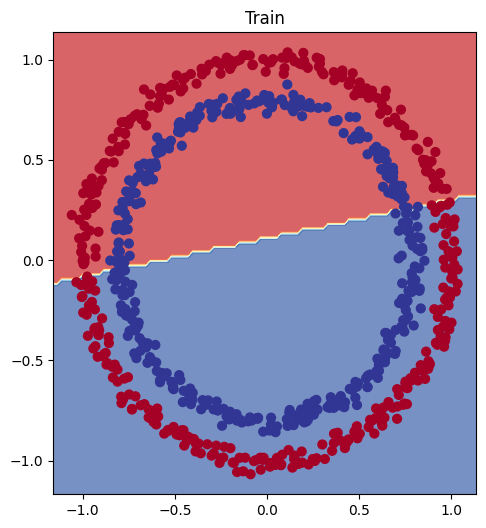

In [187]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

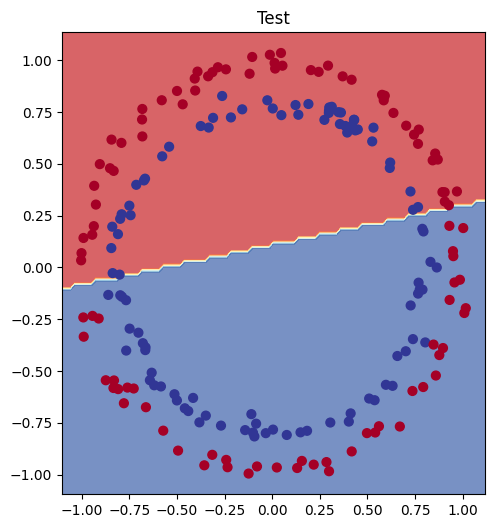

In [188]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 

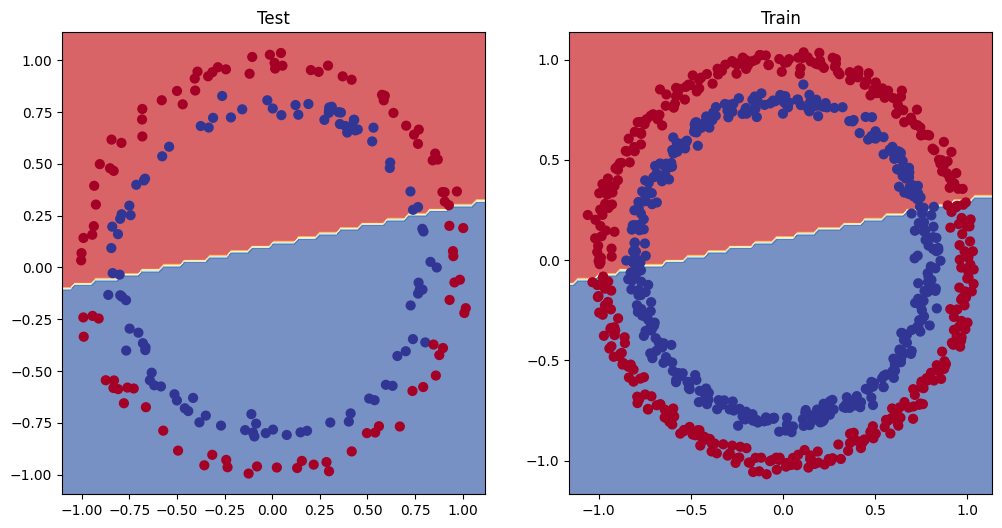

In [189]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 

#### **5. Improving a model (from a model perspective)**
- Add more layers
- Add more hidden units 
- Changing the activation functions
- Change the learning rate 
- Change the loss function

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

let's try and improve our model by:
- Adding more hidden units: 5 -> 10
- Increase the number of layers: 2 -> 3
- Increase the number of epochs: 100 -> 1000

In [190]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [191]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer3 = nn.Linear(in_features = 10, out_features = 1)
    
    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [192]:
list(model_1.parameters()), model_1.state_dict()

([Parameter containing:
  tensor([[ 0.5406,  0.5869],
          [-0.1657,  0.6496],
          [-0.1549,  0.1427],
          [-0.3443,  0.4153],
          [ 0.6233, -0.5188],
          [ 0.6146,  0.1323],
          [ 0.5224,  0.0958],
          [ 0.3410, -0.0998],
          [ 0.5451,  0.1045],
          [-0.3301,  0.1802]], requires_grad=True),
  Parameter containing:
  tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
           0.0667, -0.6984], requires_grad=True),
  Parameter containing:
  tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
            0.0346, -0.0997],
          [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
            0.1606, -0.1927],
          [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
            0.2475, -0.2247],
          [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
           -0.1886, -0.1886],
          [ 0.2844,  0

In [193]:
y_test.shape

torch.Size([200])

In [194]:
# Create a loss function 
loss_fn = nn.BCEWithLogitsLoss()

# Create a optimizer 
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer 
epochs = 1000

# Put data on the target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop 
for epoch in range(epochs):
    # Training mode
    model_1.train()

    #1. Forward pass 
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # logits -> pred probs -> pred labels 

    # Calculate the loss 
    loss = loss_fn(y_train, y_logits) # # nn.BCEWithLogitsLoss expects raw logits as input
    acc = accuracy_fn(y_true = y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. loss backward (backpropagation)
    loss.backward()
    
    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # print(X_train.shape, y_train.shape, y_logits.shape)

    # Testing mode 
    model_1.eval()
    with torch.inference_mode():

        # 1. forwar pass 
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # print(X_test.shape, y_test.shape, test_logits.shape)
        # 2. Calculate the loss
        test_loss = loss_fn(test_logits,
                        y_test)
        test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happenin'
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: nan, Acc: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 100 | Loss: nan, Acc: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 200 | Loss: nan, Acc: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 300 | Loss: nan, Acc: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 400 | Loss: nan, Acc: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 500 | Loss: nan, Acc: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 600 | Loss: nan, Acc: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 700 | Loss: nan, Acc: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 800 | Loss: nan, Acc: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 900 | Loss: nan, Acc: 0.00% | Test loss: nan, Test acc: 0.00%


**Explanation:**


- `y_logits = model_1(X_train).squeeze()`:
  - `model_1(X_train)` produces logits with shape `[batch_size, 1]`.
  - `squeeze()` removes the extra dimension, making `y_logits` a 1D tensor `[batch_size]`.
- `y_pred = torch.round(torch.sigmoid(y_logits))`:
  - `torch.sigmoid(y_logits)` converts logits to probabilities (0 to 1).
  - `torch.round` converts probabilities to binary predictions (0 or 1), e.g., `0.924 → 1`, `0.3 → 0`, for classification.

**Why this matters:**


- The `squeeze()` ensures `y_logits` is 1D to match the shape of target labels or for proper computation in `sigmoid` and `round`.
- Logits are the model’s raw scores, and sigmoid turns them into interpretable probabilities for binary classification.

---

##### **5.1 Prepare data to see if our model fit a straight line**


In [199]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias # Linear regression

X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [200]:
# train test split

train_test_split_regression = int(len(X_regression) * 0.8)
X_train_regression, y_train_regression = X_regression[:train_test_split_regression], y_regression[:train_test_split_regression]
X_test_regression, y_test_regression = X_regression[train_test_split_regression:], y_regression[train_test_split_regression:]
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)